<>:85: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:85: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:85: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:85: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:85: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:85: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_39968/643873790.py:85: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate' or info is 'episode_bit_rate_blocking_rate':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_39968/643873790.py:85: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate' or info is 'episode_bit_rate_blocking_rate':
/var/folders/m1/0h11vw6960b30qc8tpb7_q400000gp/T/ipykernel_39968/643873790.py:85: SyntaxWarning: "is" wi

[0.010869346733668333, 0.0173718592964824, 0.02401172529313231, 0.030919597989949726, 0.0386582914572864, 0.047346733668341676]
[0.005567839195979895, 0.011467336683417078, 0.018576214405360125, 0.026562814070351742, 0.034552763819095444, 0.04248743718592962]
[0.00531155778894472, 0.01033165829145728, 0.016314907872696807, 0.024522613065326618, 0.03350251256281405, 0.04214572864321605]
[0.035542713567839175, 0.040100502512562794, 0.0454941373534338, 0.05115577889447233, 0.05695979899497484, 0.06551256281407032]
[0.009711275670459422, 0.016149074732592673, 0.02211589496825337, 0.029015463893464224, 0.036049318710759296, 0.044697532729418274]
[0.004731314922415311, 0.01095802972925639, 0.01670601362901379, 0.025683036512686247, 0.03308705671384374, 0.04000517428324635]
[0.004871884228115637, 0.009122729689894105, 0.014772665847402049, 0.023537301519418966, 0.032002417658065864, 0.03987662656003111]
[0.034455133212707156, 0.03884989242596766, 0.04364320797254002, 0.04885811901652415, 0.05

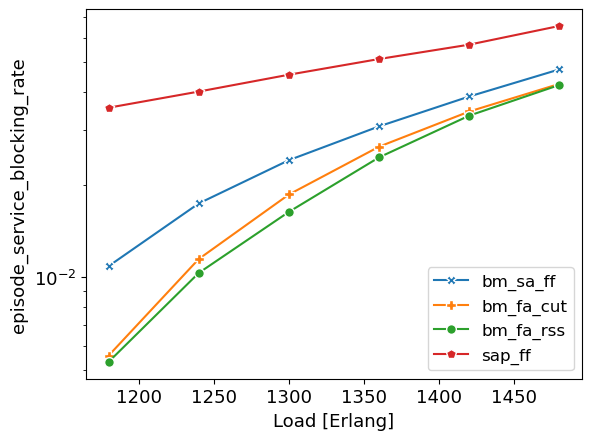

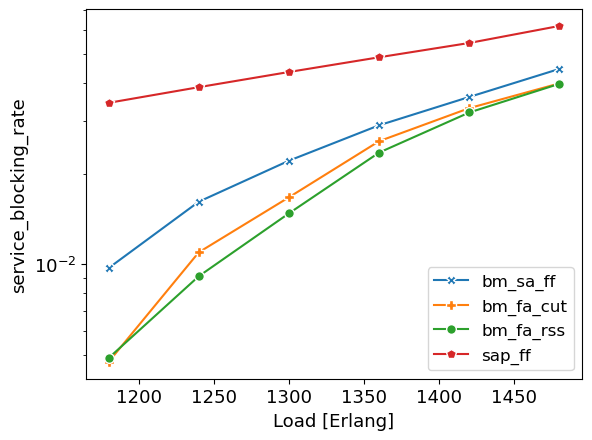

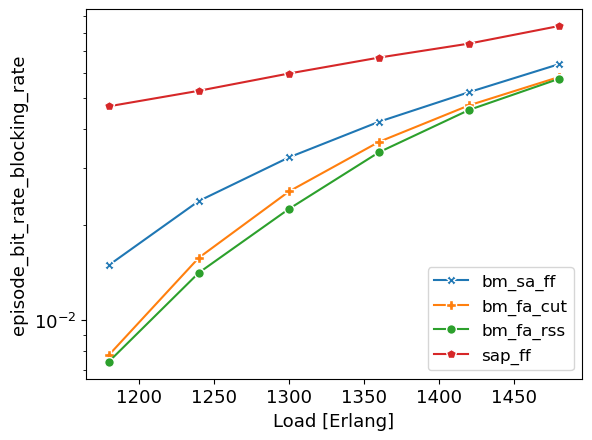

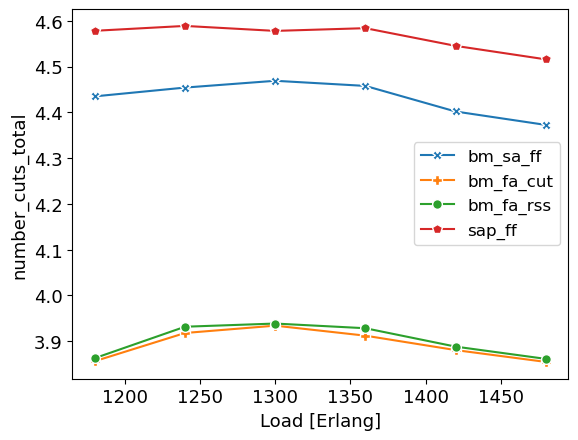

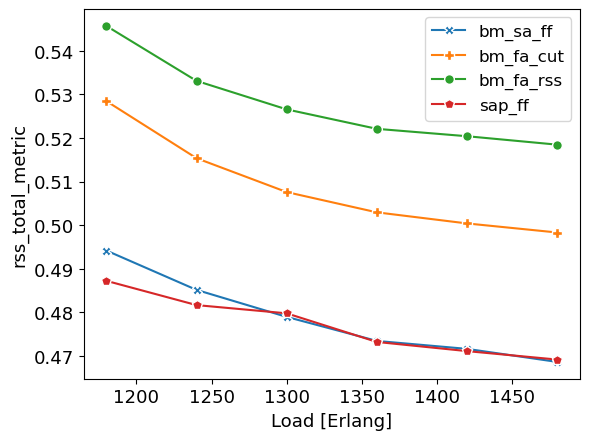

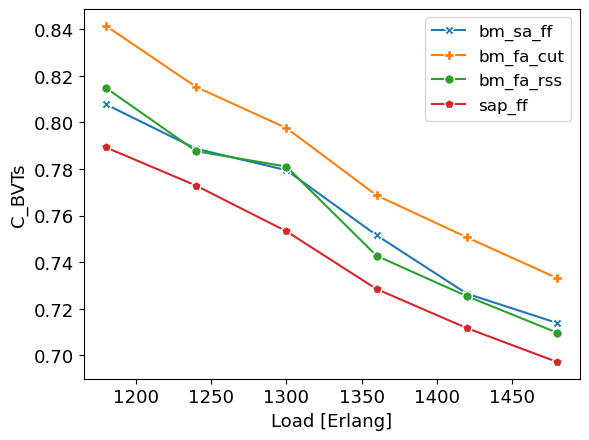

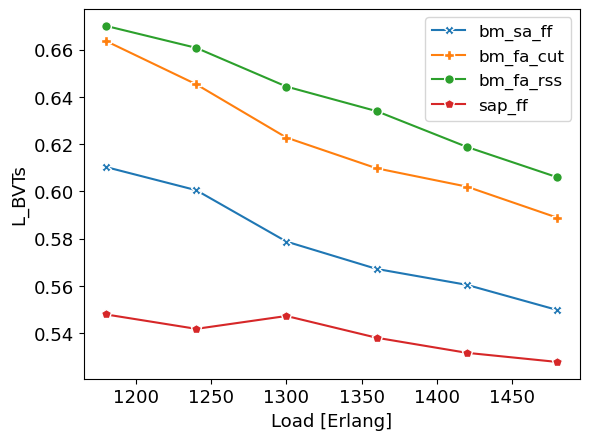

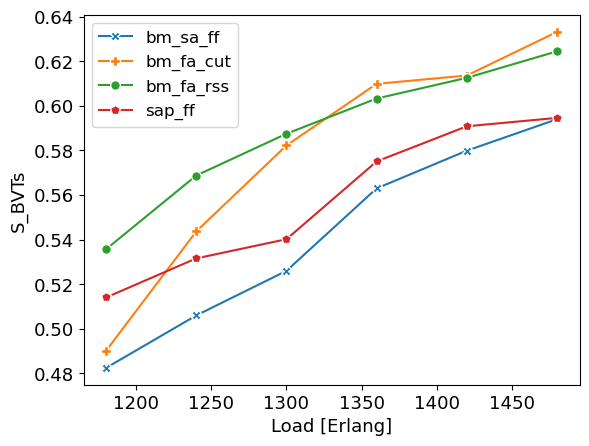

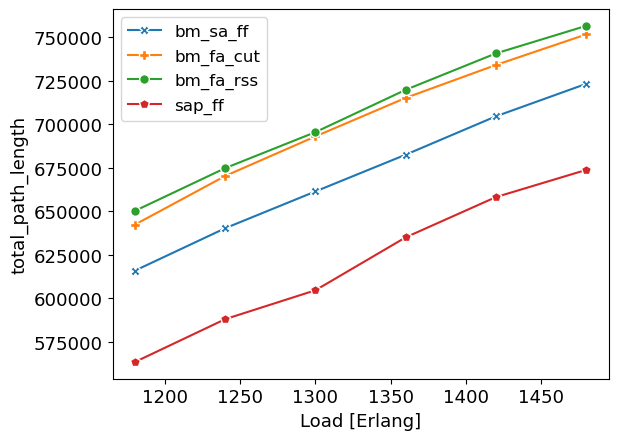

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
# from IPython.core.display import clear_output
import numpy as np
import time

heuristic_log_dir = 'phy_frag_rmsa'

topology_name = 'Germany50'
topology_name = 'jpn12'
figures_floder = f'./{heuristic_log_dir}/figures'
os.makedirs(figures_floder, exist_ok=True)

min_load = 1180
max_load = 1490
step_length = 60
steps = int((max_load - min_load) / step_length) + 1
loads = np.zeros(steps)

metrics = [
    'episode_service_blocking_rate',
    'service_blocking_rate',
    'episode_bit_rate_blocking_rate',
    'number_cuts_total',
    'rss_total_metric',
    'C_BVTs',
    'L_BVTs',
    'S_BVTs',
    'total_path_length'
]

sap_ff_loads = {metric: [] for metric in metrics}
bm_fa_cut_loads = {metric: [] for metric in metrics}
bm_fa_rss_loads = {metric: [] for metric in metrics}
bm_sa_ff_loads = {metric: [] for metric in metrics}
traffic_type = 1

for load_counter, load_traffic in enumerate(range(min_load, max_load, step_length)):
    bm_fa_cut = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_200/BM-FA-Cut.monitor.csv',
        skiprows=1)
    bm_fa_rss = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_200/BM-FA-RSS.monitor.csv', skiprows=1)
    bm_sa_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_200/BM-SA-FF.monitor.csv',
        skiprows=1)
    sap_ff = pd.read_csv(
        f'./{heuristic_log_dir}/logs_{load_traffic}_200/SAP-FF.monitor.csv',
        skiprows=1)
    loads[load_counter] = load_traffic
    for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                'C_BVTs', 'L_BVTs', 'S_BVTs', 'total_path_length']:
        bm_fa_cut_loads[info].append(np.mean(bm_fa_cut[info]))
        #             exhuastic_highest_loads[info].append(np.mean(exhaustic_highest[info]))
        bm_fa_rss_loads[info].append(np.mean(bm_fa_rss[info]))
        bm_sa_ff_loads[info].append(np.mean(bm_sa_ff[info]))
        sap_ff_loads[info].append(np.mean(sap_ff[info]))

# print(loads)
# print(f"SBR for highest-first-fit is {highest_loads['service_blocking_per_hundred_arrivals']}")


# percentage = []
# percentage1 = []
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage.append((no_df_loads['service_blocking_per_hundred_arrivals'][i] -
#                        exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                       no_df_loads['service_blocking_per_hundred_arrivals'][i])
# for i in range(len(no_df_loads['service_blocking_per_hundred_arrivals'])):
#     percentage1.append((oldest_loads['service_blocking_per_hundred_arrivals'][i] -
#                         exhuastic_oldest_loads['service_blocking_per_hundred_arrivals'][i]) /
#                        oldest_loads['service_blocking_per_hundred_arrivals'][i])

# print(f"the exhaustic vs. no df-{[round(item, 2) for item in percentage]}")
# print(f"the exhaustic vs. oldest-{[round(item, 2) for item in percentage1]}")

markersize = 7
for info in ['episode_service_blocking_rate','service_blocking_rate',
                'episode_bit_rate_blocking_rate', 'number_cuts_total', 'rss_total_metric',
                'C_BVTs', 'L_BVTs', 'S_BVTs', 'total_path_length']:
    plt.figure()
    if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate' or info is 'episode_bit_rate_blocking_rate':
    # if info is 'service_blocking_rate' or info is 'episode_service_blocking_rate':
        print(bm_sa_ff_loads[info])
        print(bm_fa_cut_loads[info])
        print(bm_fa_rss_loads[info])
        print(sap_ff_loads[info])
        ax_bm_sa_ff = plt.semilogy(loads, bm_sa_ff_loads[info], label='bm_sa_ff', marker='X', markersize=markersize,
                             markeredgecolor='white')
        ax_bm_fa_cut = plt.semilogy(loads, bm_fa_cut_loads[info], label='bm_fa_cut', marker='P', markersize=markersize,
                                 markeredgecolor='white')
        ax_bm_fa_rss = plt.semilogy(loads, bm_fa_rss_loads[info], label='bm_fa_rss', marker='o',
                                           markersize=markersize, markeredgecolor='white')
        ax_sap_ff = plt.semilogy(loads, sap_ff_loads[info], label='sap_ff', marker='p', markersize=markersize,
                                  markeredgecolor='white')
    else:
        ax_bm_sa_ff = plt.plot(loads, bm_sa_ff_loads[info], label='bm_sa_ff', marker='X', markersize=markersize,
                         markeredgecolor='white')
        ax_bm_fa_cut = plt.plot(loads, bm_fa_cut_loads[info], label='bm_fa_cut', marker='P', markersize=markersize,
                             markeredgecolor='white')
        ax_bm_fa_rss = plt.plot(loads, bm_fa_rss_loads[info], label='bm_fa_rss', marker='o',
                                       markersize=markersize, markeredgecolor='white')
        ax_sap_ff = plt.plot(loads, sap_ff_loads[info], label='sap_ff', marker='p', markersize=markersize,
                              markeredgecolor='white')
    #
    # print(f"the bm-sa-ff for {info} is {np.mean(bm_sa_ff_loads[info])} ")
    # print(f"the bm_fa_cut for {info} is {np.mean(bm_fa_cut_loads[info])} ")
    # print(f"the bm_fa_rss for {info} is {np.mean(bm_fa_rss_loads[info])} ")
    # print(f"the sap_ff for {info} is {np.mean(sap_ff_loads[info])} ")

    plt.xlabel('Load [Erlang]')
    # if info == 'service_blocking_per_hundred_arrivals':
    #     plt.ylabel('Service Blocking Ratio (SBR)', fontsize=13)
    # elif info == 'episode_frag_metric':
    #     plt.ylabel('RSS metric', fontsize=13)
    # else:
    #     plt.ylabel(info)

    plt.legend(loc='upper right')
    plt.ylabel(info)
    plt.legend(fontsize=12)
    plt.rcParams.update({'font.size': 13})
    plt.savefig(f'{figures_floder}/{topology_name}-{info}.pdf')



